COMPARISON: PALS vs Expected Oxidation Depth

1. PALS Measurement:
   Oxide thickness: 155.47 nm
   Surface S-param: 0.5748

2. Expected from Oxidation Model:
   Oxide thickness: 150.00 nm

3. Comparison:
   Difference: 5.47 nm (+3.6%)
   ✓ Excellent agreement (< 10%)

4. Converting Energy → Depth:

Saved: comparison_pals_vs_expected.pdf


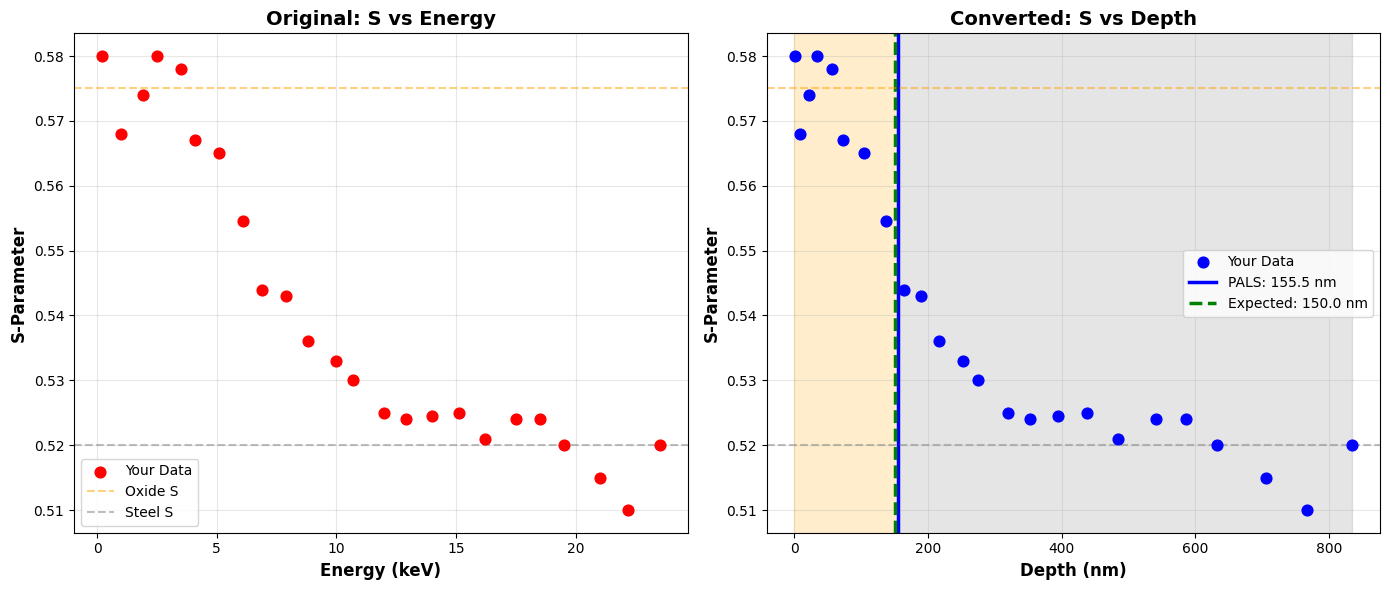

In [2]:
"""Compare PALS result to expected oxidation depth."""

import sys
sys.path.insert(0, r"C:\Users\jeanv\OneDrive - Delft University of Technology\Uitwisseling - TUDelft\Courses\MEP\Programming")

import numpy as np
import matplotlib.pyplot as plt
from pals_analysis import config
from pals_analysis.analysis import solve_for_thickness
from pals_analysis.physics import energy_to_mean_depth

# Your experimental data
energies = config.YOUR_DATA[:, 0]
s_exp = config.YOUR_DATA[:, 1]

# Fit to get PALS thickness
d_ox_pals, s_surf = solve_for_thickness(energies, s_exp)

print("=" * 70)
print("COMPARISON: PALS vs Expected Oxidation Depth")
print("=" * 70)
print(f"\n1. PALS Measurement:")
print(f"   Oxide thickness: {d_ox_pals:.2f} nm")
print(f"   Surface S-param: {s_surf:.4f}")

# YOUR EXPECTED THICKNESS - CHANGE THIS!
d_ox_expected = 150.0  # ← Put your expected value here (nm)

print(f"\n2. Expected from Oxidation Model:")
print(f"   Oxide thickness: {d_ox_expected:.2f} nm")

# Calculate difference
difference = d_ox_pals - d_ox_expected
percent_diff = (difference / d_ox_expected) * 100

print(f"\n3. Comparison:")
print(f"   Difference: {difference:.2f} nm ({percent_diff:+.1f}%)")

if abs(percent_diff) < 10:
    print("   ✓ Excellent agreement (< 10%)")
elif abs(percent_diff) < 20:
    print("   ⚠ Good agreement (10-20%)")
else:
    print("   ✗ Significant difference (> 20%)")

# Now convert to depth scale
print(f"\n4. Converting Energy → Depth:")
depths = energy_to_mean_depth(energies, d_ox_pals, 5.24, 8.00)

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: S vs Energy (original)
ax1.scatter(energies, s_exp, color='red', s=60, zorder=3, label='Your Data')
ax1.axhline(0.575, color='orange', linestyle='--', alpha=0.5, label='Oxide S')
ax1.axhline(0.52, color='gray', linestyle='--', alpha=0.5, label='Steel S')
ax1.set_xlabel('Energy (keV)', fontsize=12, fontweight='bold')
ax1.set_ylabel('S-Parameter', fontsize=12, fontweight='bold')
ax1.set_title('Original: S vs Energy', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Right: S vs Depth (converted)
ax2.scatter(depths, s_exp, color='blue', s=60, zorder=3, label='Your Data')

# Mark interfaces
ax2.axvline(d_ox_pals, color='blue', linestyle='-', linewidth=2.5,
            label=f'PALS: {d_ox_pals:.1f} nm')
ax2.axvline(d_ox_expected, color='green', linestyle='--', linewidth=2.5,
            label=f'Expected: {d_ox_expected:.1f} nm')

# Shade regions
ax2.axvspan(0, d_ox_pals, alpha=0.2, color='orange')
ax2.axvspan(d_ox_pals, depths.max(), alpha=0.2, color='gray')

ax2.axhline(0.575, color='orange', linestyle='--', alpha=0.5)
ax2.axhline(0.52, color='gray', linestyle='--', alpha=0.5)

ax2.set_xlabel('Depth (nm)', fontsize=12, fontweight='bold')
ax2.set_ylabel('S-Parameter', fontsize=12, fontweight='bold')
ax2.set_title('Converted: S vs Depth', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparison_pals_vs_expected.pdf', dpi=300)
print(f"\nSaved: comparison_pals_vs_expected.pdf")
print("=" * 70)

plt.show()